## Example for ring network

In [1]:
import numpy as np
from submanifolds.ringnet import RingNetwork
from submanifolds.ringnet import Parameters
from submanifolds.ringnet import Plot

In [2]:
# have a look in the parameters class and change things as shown with key-value pairs
params_to_update = {'keys':     ['shift_percent'], 
                    'setting':  [0.1]}

# initialize parameters class, pass to it the parameters to update (optional)
parameters = Parameters(params_to_update)

# initialize a ring network with given parameters
net = RingNetwork(parameters)

# run the simulation
net.run()

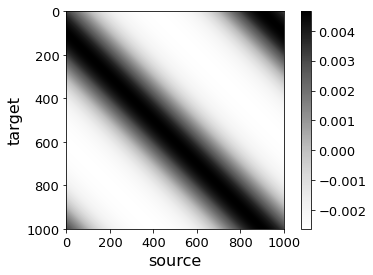

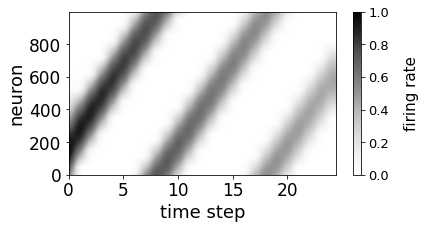

In [3]:
# plot the weight matrix and firing rates
plot = Plot()
plot.weight_matrix(net.W)
plot.activity_raster(net.R)

## Running a parameter search

In [4]:
from submanifolds.experiments import WeightMatrixExperiment
from submanifolds.experiments import Experiment
from submanifolds.ringnet import Plot
from submanifolds.utils import DataManager

## Simulations

Static parameters and iterated parameters are defined and passed to an Experiment object. The Experiment iterates through the parameter space. For each point in the space, it creates a parameter and network object, runs the simulation for that point in the paramter space.

The type "Experiment" just stores data locally and "WeightMatrixExperiment" saves the data to file.

In [5]:
simulate = 1 # flag to run simulations

In [7]:
stim = 'transient'
params_to_set = {'stim': [stim],
                 'type': ['projection'],
                 }

shift_percent = np.arange(0,0.16,.03).round(3) #np.arange(0,0.11,.01).round(2)
perc_selectivity = np.arange(0,1,0.2).round(2)
seeds = np.arange(0,5,1) 

# tuple of static parameters for referencing
static_parameters = tuple(val[0] for val in params_to_set.values())

params_to_iterate = {'p_inh': perc_selectivity,
                     'seed': seeds,
                     'shift_percent': shift_percent
                     }

#### Run experiment and store data locally

In [8]:
'''
NOTE: this experiment saves data locally
'''
if simulate == 1:
    print(params_to_iterate)
    exp = Experiment(params_to_set, params_to_iterate)
    exp.iterate()

{'p_inh': array([0. , 0.2, 0.4, 0.6, 0.8]), 'seed': array([0, 1, 2, 3, 4]), 'shift_percent': array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15])}
Current setting: ['p_inh', 'seed', 'shift_percent', 'stim', 'type'](0.0, 1, 0.15, 'transient', 'projection')

/home/andrew/Documents/projects/submanifolds/code_example/submanifolds/ringnet/parameters.py:71: UserWarning: Recurrent weights were rescaled due to selective inhibition and transient excitatory burst input.
  warnings.warn('Recurrent weights were rescaled due to selective inhibition and transient excitatory burst input.')


Current setting: ['p_inh', 'seed', 'shift_percent', 'stim', 'type'](0.8, 4, 0.15, 'transient', 'projection')

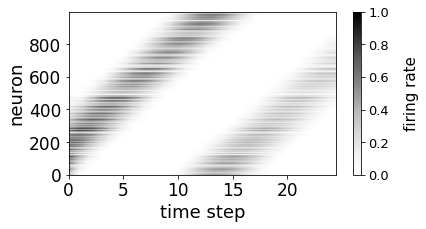

In [9]:
# select data to load
ex_perc_sel = perc_selectivity[2]
ex_seed = seeds[0]
ex_shift = shift_percent[2]

point = (ex_perc_sel, ex_seed, ex_shift)
parameter_setting = point + static_parameters

# plot activity
plot.activity_raster(exp.activity[parameter_setting])

#### Run experiment and save data to file

In [10]:
'''
NOTE: running this will create directories and store data
'''
if simulate == 1:
    print(params_to_iterate)
    exp = WeightMatrixExperiment(params_to_set, params_to_iterate)
    exp.iterate()

{'p_inh': array([0. , 0.2, 0.4, 0.6, 0.8]), 'seed': array([0, 1, 2, 3, 4]), 'shift_percent': array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15])}
Created /home/andrew/Documents/projects/submanifolds/data/weight_matrix_exp_2024-01-19_12:23:45/
Created /home/andrew/Documents/projects/submanifolds/data/weight_matrix_exp_2024-01-19_12:23:45/simulation/
Created /home/andrew/Documents/projects/submanifolds/data/weight_matrix_exp_2024-01-19_12:23:45/metadata/
Created /home/andrew/Documents/projects/submanifolds/data/weight_matrix_exp_2024-01-19_12:23:45/eigendecomposition/
Created /home/andrew/Documents/projects/submanifolds/data/weight_matrix_exp_2024-01-19_12:23:45/bump_statistics/
Current setting: ['p_inh', 'seed', 'shift_percent', 'stim', 'type'](0.8, 4, 0.15, 'transient', 'projection')

## Analysis

### Preamble

In [11]:
# directory where the data is stored, created by the experiment class
exp_data_dir = 'weight_matrix_exp_2024-01-19_12:23:45'

In [12]:
# manager is used to load data
manage = DataManager(exp_data_dir)

In [13]:
# select data to load
ex_perc_sel = perc_selectivity[2]
ex_seed = seeds[0]
ex_shift = shift_percent[2]

point = (ex_perc_sel, ex_seed, ex_shift)
parameter_setting = point + static_parameters

# load
net = manage.load_data(parameter_setting)

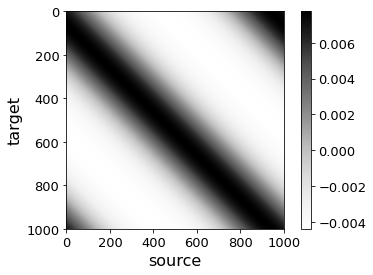

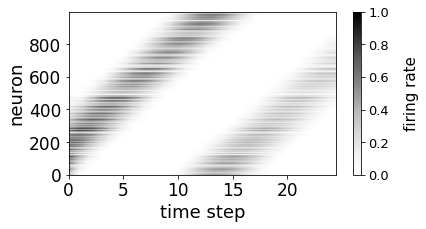

In [14]:
# plot the weight matrix and firing rates
plot = Plot()
plot.weight_matrix(net.W)
plot.activity_raster(net.R)